In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False #autocompletion trick

sns.set(rc={'figure.figsize': (15, 8)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18


plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=MEDIUM_SIZE)    
plt.rc('ytick', labelsize=MEDIUM_SIZE)   
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [112]:
nasa_df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')

### 1. First look at data

In [113]:
nasa_df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [114]:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [115]:
nasa_df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [116]:
nasa_df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [117]:
nasa_df.duplicated().sum()

0

In [118]:
nasa_df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [119]:
nasa_df.shape

(90836, 10)

### No null data, no duplicated data. Also the features est_diameter_min, est_diameter_max appear to be describing the same thing, maybe we should make average of diameter to reduce the number of features? The features orbiting_body and sentry_object are always the same, which means that they have no real effect on our future model, right? Should we drop them or fill them with like 0 and leave them be?

In [120]:
nasa_df['est_diameter'] = (nasa_df['est_diameter_min'] + nasa_df['est_diameter_max']) / 2 # feature engineering lol

In [121]:
nasa_df.head() # let them be for now: est_diameter_min, est_diameter_max

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,est_diameter
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,1.938843
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,0.430073
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,1.168268
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,0.156150
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,0.412613


In [122]:
nasa_df = nasa_df.drop(['orbiting_body', 'sentry_object'], axis=1)

In [123]:
nasa_df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False,1.938843
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True,0.430073
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False,1.168268
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False,0.156150
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True,0.412613


### 2. Second look, some EDA and maybe more cleaning.

### 2.1 Hazardous and non-hazardous objects and thier ratio.

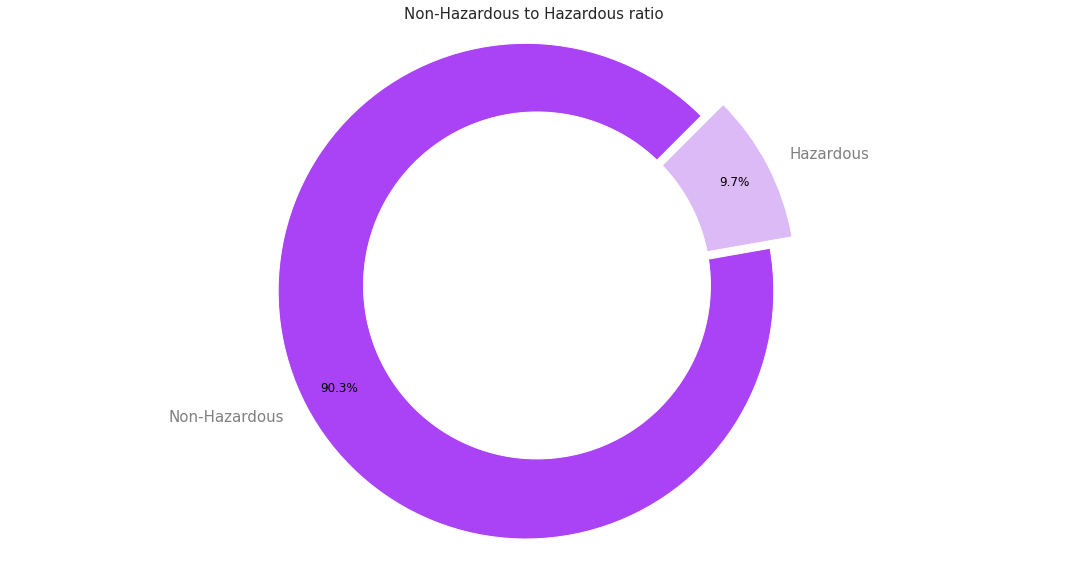

In [124]:
fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(nasa_df['hazardous'].value_counts(), explode = (0.05,0.05),
                                    colors = ['#aa42f5', '#dcbaf5'], startangle=45,
                                    pctdistance=0.85,autopct='%1.1f%%', labels=['Non-Hazardous', 'Hazardous'])
for text in texts:
    text.set_color('grey')
    
for autotext in autotexts:
    autotext.set_color('black')
    
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
ax1.set_title('Non-Hazardous to Hazardous ratio')
plt.tight_layout()
plt.show()

In [125]:
by_hazardous = nasa_df.groupby('hazardous')

In [126]:
avg_velo = by_hazardous['relative_velocity'].mean()
est_diameter = by_hazardous['est_diameter'].mean()

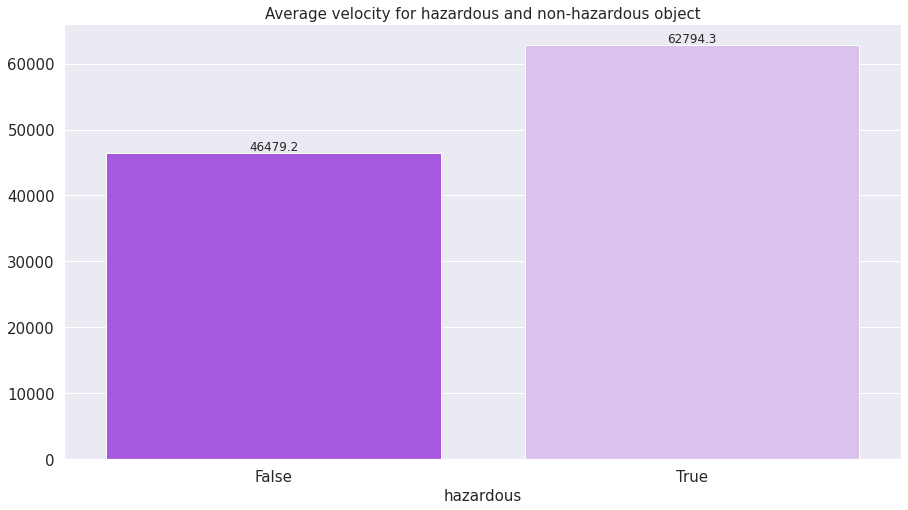

In [127]:
ax = sns.barplot(x=avg_velo.index, y=avg_velo.values, palette=['#aa42f5', '#dcbaf5'])
ax.bar_label(ax.containers[0])
ax.set_title('Average velocity for hazardous and non-hazardous object')
plt.show()

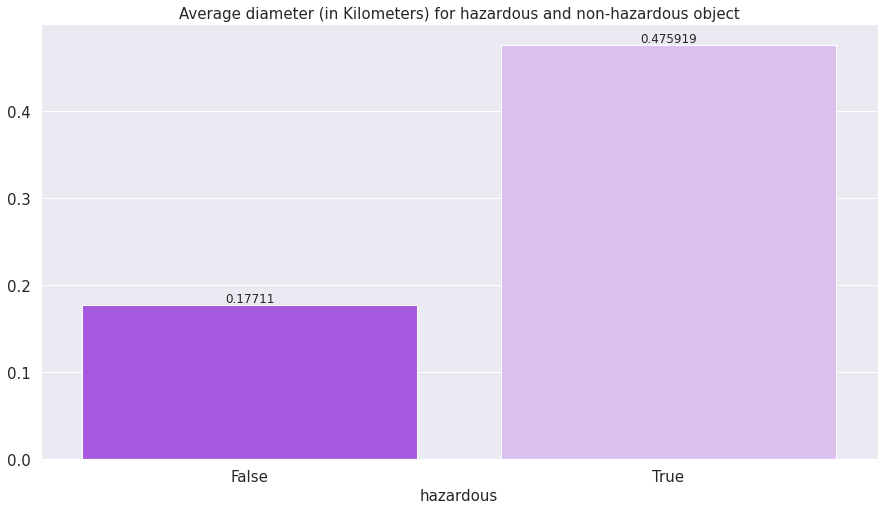

In [128]:
ax = sns.barplot(x=est_diameter.index, y=est_diameter.values, palette=['#aa42f5', '#dcbaf5'])
ax.bar_label(ax.containers[0])
ax.set_title('Average diameter (in Kilometers) for hazardous and non-hazardous object')
plt.show()

### 2.2 Numeric distributions of some features

<AxesSubplot:xlabel='relative_velocity', ylabel='Count'>

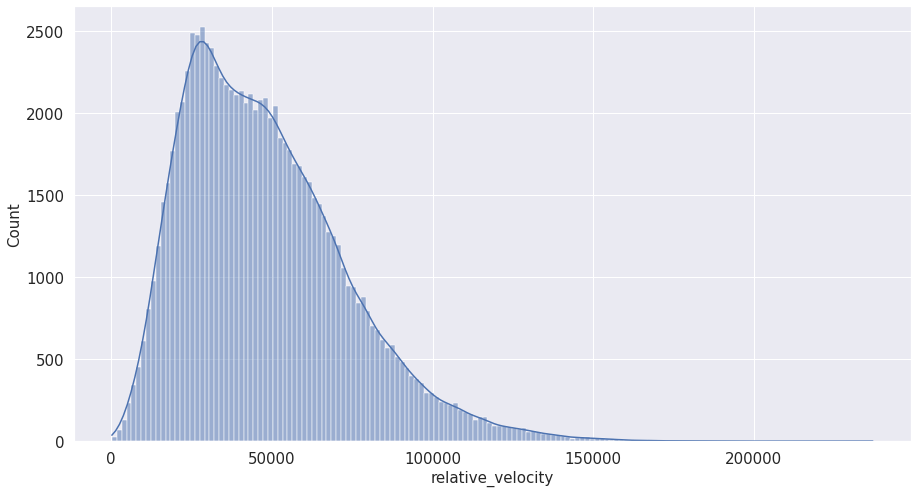

In [129]:
sns.histplot(data=nasa_df, x='relative_velocity', kde=True )

<AxesSubplot:xlabel='absolute_magnitude', ylabel='Count'>

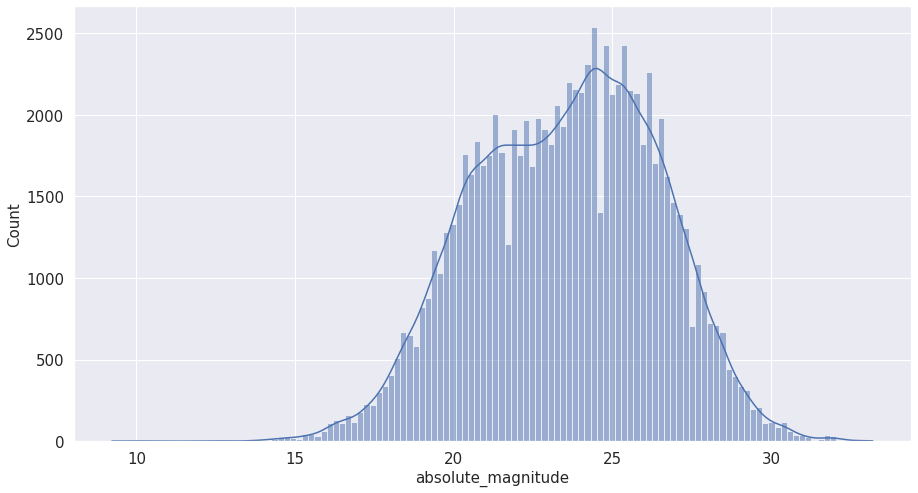

In [130]:
sns.histplot(data=nasa_df, x='absolute_magnitude', kde=True )

In [131]:
nasa_df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False,1.938843
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True,0.430073
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False,1.168268
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False,0.156150
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True,0.412613


## 3. Data preparation

### For our own sanity lets drop columns est_diameter_min and est_diameter_max, because this information is already in est_diameter (more or less), also the values vary a lot, so we need to scale them somehow to similar magnitude.

In [132]:
nasa_df = nasa_df.drop(['est_diameter_min', 'est_diameter_max'], axis=1)

In [133]:
nasa_df['hazardous'] = pd.factorize(nasa_df['hazardous'])[0]

In [134]:
objects_ids = nasa_df['id']
nasa_df = nasa_df.drop(['id', 'name'], axis=1)

In [135]:
X = nasa_df.drop('hazardous', axis=1)
y = nasa_df['hazardous']

#### Since decision trees do not need to have data normally distributed and are not so sesnisitive to outliers we will use MinMax scaler

In [136]:
from sklearn.preprocessing import MinMaxScaler
columns = ['relative_velocity', 	'miss_distance' ,	'absolute_magnitude',	'est_diameter']
scaler = MinMaxScaler()
X[columns] = scaler.fit_transform(X[columns])

In [137]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # SSS to ensure equal distribution of hazardous
splitter=StratifiedShuffleSplit(n_splits=1, random_state=1337)

for train, test in splitter.split(X, y):
    X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]

In [138]:
y_train.value_counts()[1] / y_train.value_counts()[0] * 100

10.781072144831699

In [139]:
y_test.value_counts()[1] / y_test.value_counts()[0] * 100

10.78048780487805

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [141]:
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()


In [142]:
def cross_validate(models: list, X, y, cv):
    for model in models:
        print(f'{model}: {cross_val_score(model, X, y, cv=cv).mean()}')

### Before param tunning

In [143]:
cross_validate([tree, forest], X=X, y=y, cv=5)

DecisionTreeClassifier(): 0.8893062019367891
RandomForestClassifier(): 0.9144502953747022


### Param tunning part 1.

In [144]:
 from sklearn.model_selection import RandomizedSearchCV

In [145]:
param_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 6],
    'min_samples_split': [2, 6, 8],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'log2']  
}

param_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 6],
    'min_samples_split': [2, 6, 8],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'n_estimators':[100, 150, 200]
}

In [146]:
rsc_tree = RandomizedSearchCV(tree, param_tree, cv=3)
rsc_forest = RandomizedSearchCV(forest, param_forest, cv=3)

In [147]:
#rsc_tree.fit(X, y)
#rsc_forest.fit(X, y)

In [148]:
#rsc_tree.best_params_

In [149]:
#rsc_forest.best_params_

### After param tunning

In [150]:
tree = DecisionTreeClassifier(min_samples_split=8, min_samples_leaf=1, max_depth=4, criterion='entropy')
forest = RandomForestClassifier(bootstrap=True, criterion='entropy', max_features='sqrt',
                                min_samples_leaf=3, min_samples_split=2, n_estimators=200)

In [151]:
cross_validate([tree, forest], X=X, y=y, cv=5)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=8): 0.9125346796564784
RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=3, n_estimators=200): 0.9169712906507576


### 2 final models

In [152]:
def scoring(model, X_train, X_test, y_train, y_test):
    print(f'{model}: {model.score(X_train, y_train)} on training set')
    print(f'{model}: {model.score(X_test, y_test)} on test set')

In [153]:
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=3, n_estimators=200)

In [154]:
scoring(tree, X_train, X_test, y_train, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=8): 0.9124425090517663 on training set
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=8): 0.9142448260678115 on test set


In [155]:
scoring(forest, X_train, X_test, y_train, y_test) 

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=3, n_estimators=200): 0.9748263039436345 on training set
RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=3, n_estimators=200): 0.9207397622192867 on test set


#### Confusion matrix

In [156]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### RandomForestClassifier - better score

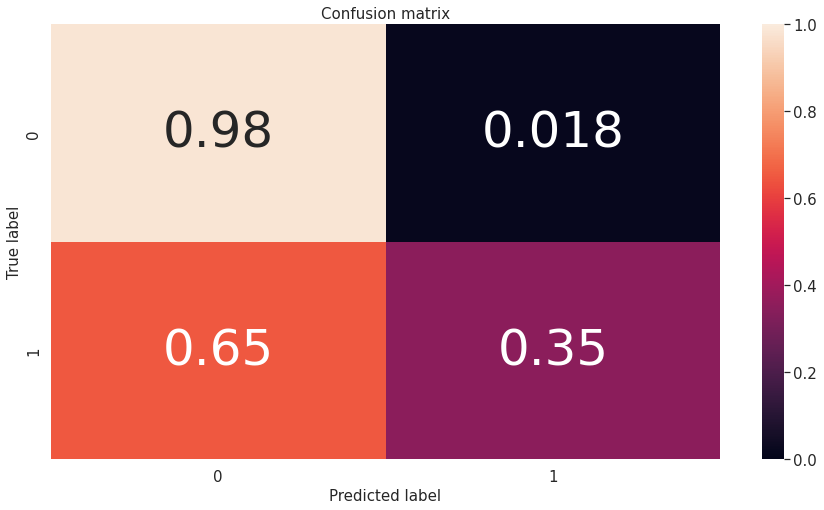

In [157]:
y_pred = forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=forest.classes_)

In [168]:
forest.score(X_test, y_test)

0.9207397622192867

Text(0.5, 1.0, 'Feature importance')

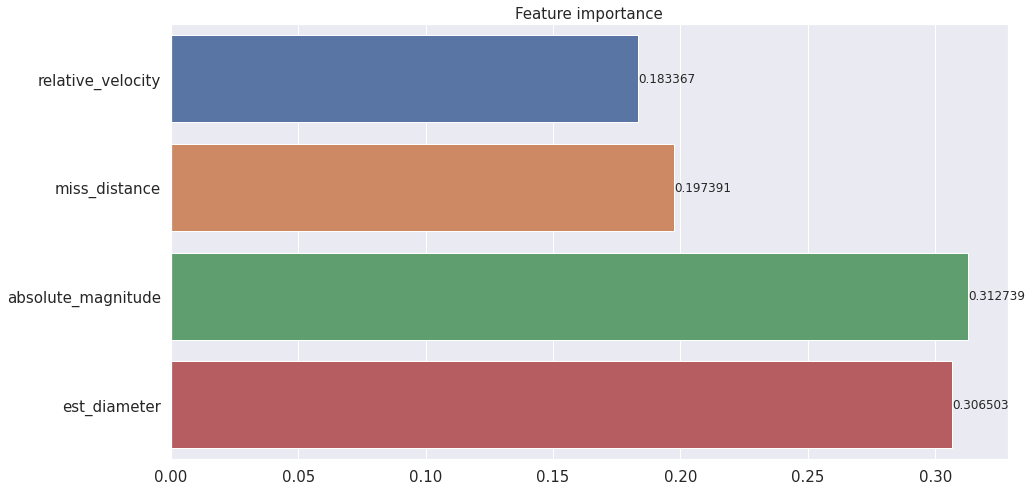

In [167]:
ax = sns.barplot(x=forest.feature_importances_, y=forest.feature_names_in_, orient='h')
ax.bar_label(ax.containers[0])
ax.set_title('Feature importance')